In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [42]:
X_train = pd.read_csv('training_set_features.csv')
X_train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [43]:
X_train.shape

(26707, 36)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [45]:
X_train.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [46]:
X_train.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [47]:
percent_missing=X_train.isnull().sum()*100/len(X_train)
percent_missing

respondent_id                   0.000000
xyz_concern                     0.344479
xyz_knowledge                   0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_xyz                 8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_xyz_vacc_effective      1.464036
opinion_xyz_risk                1.452803
opinion_xyz_sick_from_vacc      1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [48]:
missing_perct_df=pd.DataFrame({"col_name":X_train.columns,"% missing":percent_missing})
# missing_perct_df.head(11)
missing_perct_df.sort_values(by="% missing",ascending=False)

,col_name,% missing
employment_occupation,employment_occupation,50.436215
employment_industry,employment_industry,49.912008
health_insurance,health_insurance,45.957989
income_poverty,income_poverty,16.561201
doctor_recc_xyz,doctor_recc_xyz,8.087767
doctor_recc_seasonal,doctor_recc_seasonal,8.087767
rent_or_own,rent_or_own,7.645936
employment_status,employment_status,5.477965
marital_status,marital_status,5.272026
education,education,5.268282


In [49]:
X_train.drop(['employment_occupation','employment_industry','health_insurance'],axis=1,inplace=True)
X_train.shape

(26707, 33)

<AxesSubplot:>

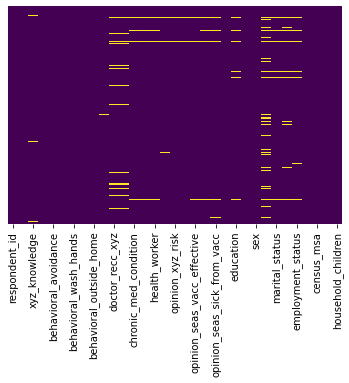

In [50]:
sns.heatmap(X_train.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
binary_df=X_train.select_dtypes(include=['float64']).copy()
binary_df.isnull().sum()*100/len(binary_df)

xyz_concern                    0.344479
xyz_knowledge                  0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_xyz                8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_xyz_vacc_effective     1.464036
opinion_xyz_risk               1.452803
opinion_xyz_sick_from_vacc     1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
household_adults               0.932340
household_children             0.932340
dtype: float64

In [52]:
binary_columns=binary_df.columns
binary_columns=list(binary_columns)

In [53]:
imputer=SimpleImputer(strategy='most_frequent')
X_train[binary_columns]=imputer.fit_transform(X_train[binary_columns])
X_train.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [54]:
opinion_col=[col for col in X_train.columns if 'opinion' in col]  
opinion_col.append('xyz_knowledge')
opinion_col.append('xyz_concern')

In [55]:
X_train[opinion_col]=imputer.fit_transform(X_train[opinion_col])
X_train.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4423
marital_status                 1408
rent_or_own                 

In [56]:
obj_df=X_train.select_dtypes(include=['object']).copy()
obj_df.head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"


In [57]:
cat_columns=obj_df.columns
cat_columns=list(cat_columns)

In [58]:
obj_df.isnull().sum()*100/len(obj_df)

age_group             0.000000
education             5.268282
race                  0.000000
sex                   0.000000
income_poverty       16.561201
marital_status        5.272026
rent_or_own           7.645936
employment_status     5.477965
hhs_geo_region        0.000000
census_msa            0.000000
dtype: float64

In [59]:
obj_df['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [60]:
X_train[cat_columns]=imputer.fit_transform(X_train[cat_columns])
X_train.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [61]:

X_train.isnull().sum()*100/len(X_train)
X_train.shape

(26707, 33)

In [62]:
X_test=pd.read_csv('test_set_features.csv')
X_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [63]:
X_test.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [64]:
percent_missing=X_test.isnull().sum()*100/len(X_test)
percent_missing

respondent_id                   0.000000
xyz_concern                     0.318257
xyz_knowledge                   0.456792
behavioral_antiviral_meds       0.295792
behavioral_avoidance            0.797514
behavioral_face_mask            0.071140
behavioral_wash_hands           0.149768
behavioral_large_gatherings     0.269582
behavioral_outside_home         0.307024
behavioral_touch_face           0.479257
doctor_recc_xyz                 8.087464
doctor_recc_seasonal            8.087464
chronic_med_condition           3.489591
child_under_6_months            3.044032
health_worker                   2.954171
health_insurance               45.784035
opinion_xyz_vacc_effective      1.490190
opinion_xyz_risk                1.422795
opinion_xyz_sick_from_vacc      1.404074
opinion_seas_vacc_effective     1.692377
opinion_seas_risk               1.868354
opinion_seas_sick_from_vacc     1.950726
age_group                       0.000000
education                       5.268084
race            

In [65]:
missing_perct_df=pd.DataFrame({"col_name":X_test.columns,"% missing":percent_missing})
# missing_perct_df.head(11)
missing_perct_df.sort_values(by="% missing",ascending=False)

,col_name,% missing
employment_occupation,employment_occupation,50.269582
employment_industry,employment_industry,49.704208
health_insurance,health_insurance,45.784035
income_poverty,income_poverty,16.837652
doctor_recc_xyz,doctor_recc_xyz,8.087464
doctor_recc_seasonal,doctor_recc_seasonal,8.087464
rent_or_own,rent_or_own,7.623184
employment_status,employment_status,5.507713
marital_status,marital_status,5.399131
education,education,5.268084


In [66]:

X_test.drop(['employment_occupation','employment_industry','health_insurance'],axis=1,inplace=True)
X_test.shape

(26708, 33)

In [67]:
binary_df=X_test.select_dtypes(include=['float64']).copy()
binary_df.isnull().sum()*100/len(binary_df)
binary_columns=binary_df.columns
binary_columns=list(binary_columns)
X_test[binary_columns]=imputer.fit_transform(X_test[binary_columns])
X_test.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                 

In [68]:
opinion_col=[col for col in X_test.columns if 'opinion' in col]  
opinion_col.append('xyz_knowledge')
opinion_col.append('xyz_concern')
X_test[opinion_col]=imputer.fit_transform(X_test[opinion_col])
X_test.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                      1407
race                              0
sex                               0
income_poverty                 4497
marital_status                 1442
rent_or_own                 

In [69]:
obj_df=X_test.select_dtypes(include=['object']).copy()
obj_df.head()
cat_columns=obj_df.columns
cat_columns=list(cat_columns)
X_test[cat_columns]=imputer.fit_transform(X_test[cat_columns])
X_test.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

##
Converting Categorical Features


In [70]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [71]:
for col in cat_columns:
    print("column values:",col,X_train[col].unique())

column values: age_group ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
column values: education ['< 12 Years' '12 Years' 'College Graduate' 'Some College']
column values: race ['White' 'Black' 'Other or Multiple' 'Hispanic']
column values: sex ['Female' 'Male']
column values: income_poverty ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
column values: marital_status ['Not Married' 'Married']
column values: rent_or_own ['Own' 'Rent']
column values: employment_status ['Not in Labor Force' 'Employed' 'Unemployed']
column values: hhs_geo_region ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
column values: census_msa ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [72]:
le=LabelEncoder()

for col in cat_columns:
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.fit_transform(X_test[col])

he=OneHotEncoder()
X_train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,8,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,1,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,9,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,5,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,9,0,1.0,0.0


In [73]:
for col in cat_columns:
    print("column values:",col,X_train[col].unique())

column values: age_group [3 1 0 4 2]
column values: education [1 0 2 3]
column values: race [3 0 2 1]
column values: sex [0 1]
column values: income_poverty [2 0 1]
column values: marital_status [1 0]
column values: rent_or_own [0 1]
column values: employment_status [1 0 2]
column values: hhs_geo_region [8 1 9 5 0 6 3 7 2 4]
column values: census_msa [2 0 1]


In [74]:
y_train=pd.read_csv('training_set_labels.csv')
y_train_xyz_vaccine=y_train['xyz_vaccine']
y_train_seasonal_vaccine=y_train['seasonal_vaccine']
#y_train=y_train[]
y_train_seasonal_vaccine.head()

0    0
1    1
2    0
3    1
4    0
Name: seasonal_vaccine, dtype: int64

In [75]:
from sklearn.linear_model import LogisticRegression

# 2.Initilize
model1 = LogisticRegression()
model2=LogisticRegression()

# 3.train
model1.fit(X_train,y_train_xyz_vaccine)
model2.fit(X_train,y_train_seasonal_vaccine)


# 4.predict
y_pred_xyz_vaccine = model1.predict_proba(X_test)
y_pred_seasonal_vaccine = model2.predict_proba(X_test)


In [76]:
y_pred_seasonal_vaccine

array([[0.75571339, 0.24428661],
       [0.93024949, 0.06975051],
       [0.49145929, 0.50854071],
       ...,
       [0.72625303, 0.27374697],
       [0.44612669, 0.55387331],
       [0.41682609, 0.58317391]])

In [77]:
ids=pd.DataFrame(X_test['respondent_id'])
prob_xyz_vaccine=pd.DataFrame(y_pred_xyz_vaccine[:,1],columns=['h1n1_vaccine'])
prob_seasonal_vaccine=pd.DataFrame(y_pred_seasonal_vaccine[:,1],columns=['seasonal_vaccine'])


In [78]:
# Combine predictions and probabilities
final_df = pd.concat([ids,prob_xyz_vaccine,prob_seasonal_vaccine], axis=1)
final_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.096036,0.244287
1,26708,0.050173,0.069751
2,26709,0.162065,0.508541
3,26710,0.534757,0.917347
4,26711,0.213156,0.649716


In [79]:
final_df.to_csv('Nihal_kumar_datahack.csv', index=False)